<a href="https://colab.research.google.com/github/YashiGoyal-02/Smart-Bridge-AI-Assignments/blob/main/SmartBridgeAI_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

In [2]:
#Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [4]:
train = train_gen.flow_from_directory('/content/dataset/Training', target_size=(120,120), 
                                      class_mode='categorical', batch_size=8) 
test = test_gen.flow_from_directory('/content/dataset/Testing', target_size=(120,120), 
                                      class_mode='categorical', batch_size=8) 

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [9]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [6]:
#CNN

from tensorflow.keras.layers import Convolution2D, MaxPooling2D , Flatten , Dense 
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
model.fit(train, batch_size=8, validation_data=test, epochs=10)

Epoch 1/10
155/155 [==============================] - 20s 71ms/step - loss: 1.5983 - accuracy: 0.3489 - val_loss: 1.2512 - val_accuracy: 0.3160
Epoch 2/10
155/155 [==============================] - 11s 69ms/step - loss: 1.1910 - accuracy: 0.4418 - val_loss: 1.1826 - val_accuracy: 0.5153
Epoch 3/10
155/155 [==============================] - 11s 70ms/step - loss: 1.0496 - accuracy: 0.5533 - val_loss: 0.9813 - val_accuracy: 0.6779
Epoch 4/10
155/155 [==============================] - 11s 69ms/step - loss: 0.8732 - accuracy: 0.6422 - val_loss: 0.7458 - val_accuracy: 0.7362
Epoch 5/10
155/155 [==============================] - 11s 70ms/step - loss: 0.7198 - accuracy: 0.7213 - val_loss: 0.6520 - val_accuracy: 0.7362
Epoch 6/10
155/155 [==============================] - 10s 68ms/step - loss: 0.6053 - accuracy: 0.7981 - val_loss: 0.5234 - val_accuracy: 0.9080
Epoch 7/10
155/155 [==============================] - 11s 68ms/step - loss: 0.4265 - accuracy: 0.9039 - val_loss: 0.3520 - val_accuracy:

In [12]:
model.save('animalWeights.h5')

In [13]:
#Testing

import numpy as np
from tensorflow.keras.preprocessing import image

In [36]:
img = image.load_img('/content/rat.webp', target_size=(120,120))

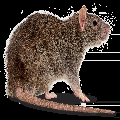

In [37]:
img

In [38]:
img = image.img_to_array(img)

In [39]:
img

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [39., 36., 37.],
        [39., 36., 37.],
        [39., 36., 37.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [40]:
img = np.expand_dims(img, axis=0)
img

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [39., 36., 37.],
         [39., 36., 37.],
         [39., 36., 37.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
        

In [41]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 19ms/step


2